In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("godfather_emotions.csv")
data.head()

,Unnamed: 0,id,text,character,conversation_id,reply_to,clean_text,tokenize,tokenize_lemmatized,final_text,prediction
0,224,L593678,"Christ, Tom; I needed more time with him. I r...",MICHAEL,L593678,NaN,christ tom needed time needed,"['christ', 'tom', 'needed', 'time', 'needed']","['christ', 'tom', 'needed', 'time', 'needed']",christ tom needed time needed,fear
1,42,L593090,You heard about your father?,CLEMENZA,L593090,NaN,heard father,"['heard', 'father']","['heard', 'father']",heard father,fear
2,285,L592894,They're waiting to see my father.,MICHAEL,L592893,L592893,theyre waiting father,"['theyre', 'waiting', 'father']","['theyre', 'waiting', 'father']",theyre waiting father,joy
3,302,L593284,Cut it out.,MICHAEL,L593283,L593283,cut,['cut'],['cut'],cut,fear
4,56,L592872,"What are you, a dance judge? Go do your job; ...",CLEMENZA,L592871,L592871,dance judge job walk neighborhood okay,"['dance', 'judge', 'job', 'walk', 'neighborhoo...","['dance', 'judge', 'job', 'walk', 'neighborhoo...",dance judge job walk neighborhood okay,fear


In [3]:
data = data[['id', 'character', 'text', 'final_text', 'prediction', 'conversation_id', 'reply_to']]
data.head()

,id,character,text,final_text,prediction,conversation_id,reply_to
0,L593678,MICHAEL,"Christ, Tom; I needed more time with him. I r...",christ tom needed time needed,fear,L593678,NaN
1,L593090,CLEMENZA,You heard about your father?,heard father,fear,L593090,NaN
2,L592894,MICHAEL,They're waiting to see my father.,theyre waiting father,joy,L592893,L592893
3,L593284,MICHAEL,Cut it out.,cut,fear,L593283,L593283
4,L592872,CLEMENZA,"What are you, a dance judge? Go do your job; ...",dance judge job walk neighborhood okay,fear,L592871,L592871


## Crime, Drama, Thriller are the genres of the film selected, indeed the fear is the most common emotion detected

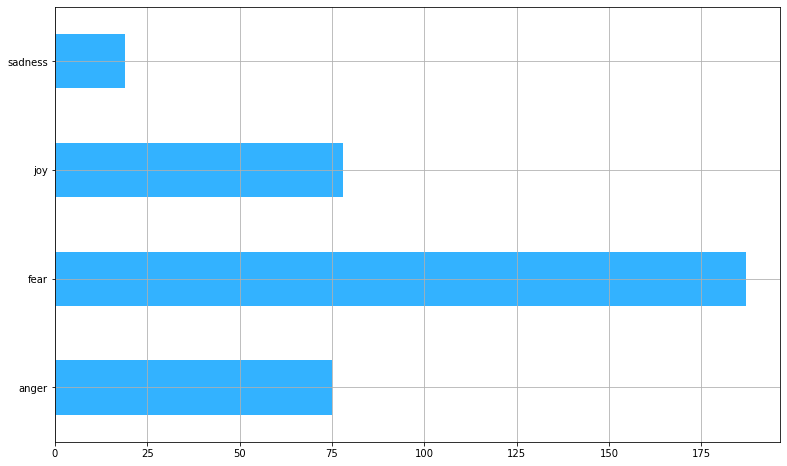

In [4]:
data.prediction.value_counts().sort_index(ascending=True).plot(kind='barh',figsize=(13, 8), color='#33B2FF')
plt.grid()

## Overall Sentiments of the main Characters

In [11]:
# to get the dataframe in the correct shape, unstack the groupby result
df = data.groupby(['character']).prediction.value_counts().unstack()
df['tot'] = data.groupby(['character']).prediction.size()
df['anger'] = round(df['anger']/df['tot']*100)
df['fear'] = round(df['fear']/df['tot']*100)
df['joy'] = round(df['joy']/df['tot']*100)
df['sadness'] = round(df['sadness']/df['tot']*100)
del df['tot']
df

prediction,anger,fear,joy,sadness
character,,,,
CLEMENZA,15.0,50.0,25.0,10.0
DON CORLEONE,16.0,57.0,26.0,NaN
HAGEN,20.0,55.0,18.0,6.0
MICHAEL,22.0,49.0,22.0,6.0
SONNY,25.0,51.0,19.0,5.0


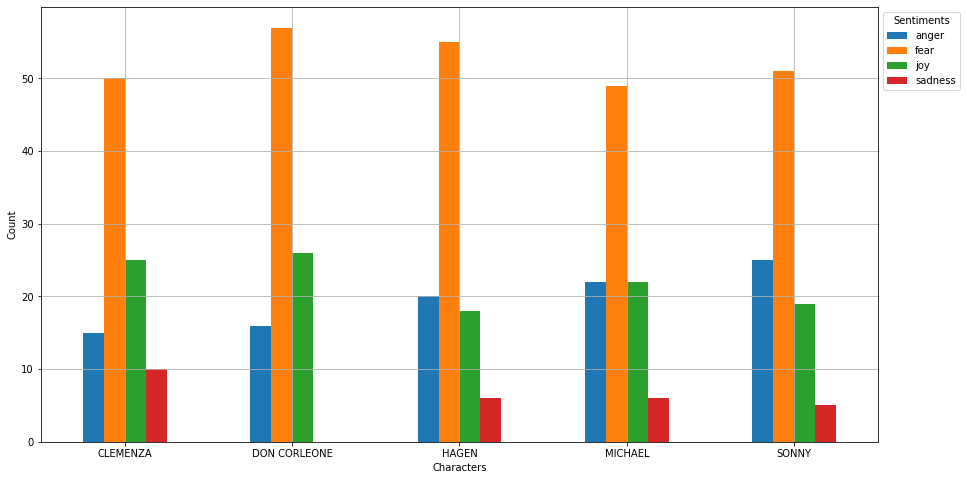

In [12]:
# plot
ax = df.plot(kind='bar', 
             figsize=(15, 8), 
             xlabel='Characters', 
             ylabel='Count', rot=0)
ax.legend(title='Sentiments', 
          bbox_to_anchor=(1, 1), 
          loc='upper left')
plt.grid()

## We can also visualize the same by sentiments

In [13]:
# to get the dataframe in the correct shape, unstack the groupby result
df = data.groupby(['prediction']).character.value_counts().unstack()
df['tot'] = data.groupby(['prediction']).character.size()

df

character,CLEMENZA,DON CORLEONE,HAGEN,MICHAEL,SONNY,tot
prediction,,,,,,
anger,3.0,10.0,13.0,34.0,15.0,75
fear,10.0,35.0,36.0,76.0,30.0,187
joy,5.0,16.0,12.0,34.0,11.0,78
sadness,2.0,NaN,4.0,10.0,3.0,19


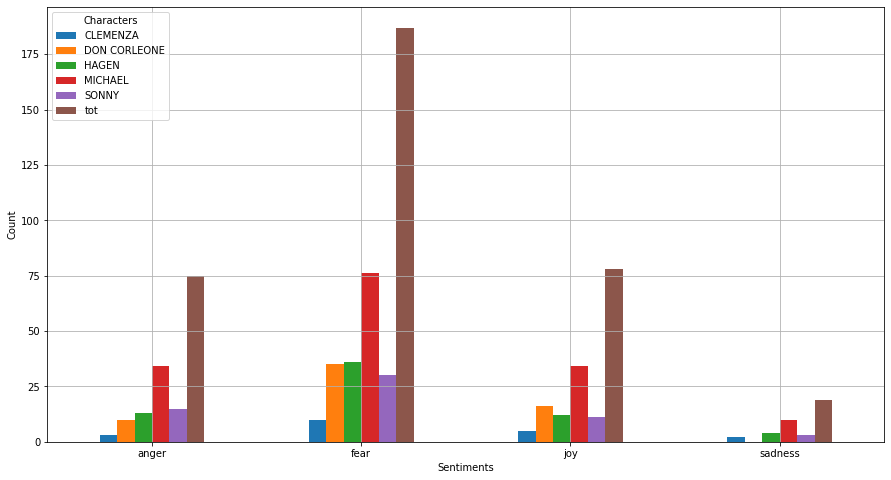

In [14]:
# plot
ax = df.plot(kind='bar', 
             figsize=(15, 8), 
             xlabel='Sentiments', 
             ylabel='Count', rot=0)
ax.legend(title='Characters', loc='upper left')
plt.grid()

In [15]:
data.head()

,id,character,text,final_text,prediction,conversation_id,reply_to
0,L593678,MICHAEL,"Christ, Tom; I needed more time with him. I r...",christ tom needed time needed,fear,L593678,NaN
1,L593090,CLEMENZA,You heard about your father?,heard father,fear,L593090,NaN
2,L592894,MICHAEL,They're waiting to see my father.,theyre waiting father,joy,L592893,L592893
3,L593284,MICHAEL,Cut it out.,cut,fear,L593283,L593283
4,L592872,CLEMENZA,"What are you, a dance judge? Go do your job; ...",dance judge job walk neighborhood okay,fear,L592871,L592871


In [16]:
# create 2 dataframe to make the join

data_respondent = data.iloc[:,[0,1,2,4,5,6]]
data_speaker = data.iloc[:,[0,1,2,4]]

In [17]:
data_speaker.head(3)

,id,character,text,prediction
0,L593678,MICHAEL,"Christ, Tom; I needed more time with him. I r...",fear
1,L593090,CLEMENZA,You heard about your father?,fear
2,L592894,MICHAEL,They're waiting to see my father.,joy


In [18]:
data_respondent.head(3)

,id,character,text,prediction,conversation_id,reply_to
0,L593678,MICHAEL,"Christ, Tom; I needed more time with him. I r...",fear,L593678,NaN
1,L593090,CLEMENZA,You heard about your father?,fear,L593090,NaN
2,L592894,MICHAEL,They're waiting to see my father.,joy,L592893,L592893


In [19]:
conversations = pd.merge(data_respondent, data_speaker, 
                         left_on='reply_to',right_on='id',
                         how='inner',suffixes=('_respondent','_speaker'))

conversations.head(3)

,id_respondent,character_respondent,text_respondent,prediction_respondent,conversation_id,reply_to,id_speaker,character_speaker,text_speaker,prediction_speaker
0,L593284,MICHAEL,Cut it out.,fear,L593283,L593283,L593283,SONNY,"Mikey, you look beautiful!",joy
1,L593546,MICHAEL,I could accept everything that's happened; I c...,fear,L593541,L593545,L593545,DON CORLEONE,"Accept what's happened, Michael.",fear
2,L592990,MICHAEL,I'm going to finish school.,sadness,L592983,L592989,L592989,DON CORLEONE,"And now, what do you choose to do?",joy


## Now we have a dataframe with couples of speaker-respondent
In the following dataframe we have collected the pairs of characters which are involved in a dialogue, reporting the corpus of dialogues and the predicted emotions of both.

In [20]:
conversations = conversations.iloc[:,[4,7,8,9,1,2,3]]

conversations.head(3)

,conversation_id,character_speaker,text_speaker,prediction_speaker,character_respondent,text_respondent,prediction_respondent
0,L593283,SONNY,"Mikey, you look beautiful!",joy,MICHAEL,Cut it out.,fear
1,L593541,DON CORLEONE,"Accept what's happened, Michael.",fear,MICHAEL,I could accept everything that's happened; I c...,fear
2,L592983,DON CORLEONE,"And now, what do you choose to do?",joy,MICHAEL,I'm going to finish school.,sadness


In [21]:
# sort by conversation id getting the chronological order in which they are said
conversations.sort_values(by=['conversation_id'], inplace=True)

conversations.head(10)

,conversation_id,character_speaker,text_speaker,prediction_speaker,character_respondent,text_respondent,prediction_respondent
147,L592889,DON CORLEONE,Is it necessary?,fear,HAGEN,You understand him better than anyone.,fear
55,L592928,HAGEN,"Hello Kay. Your father's inside, doing some b...",anger,MICHAEL,Thanks Tom.,fear
65,L592936,DON CORLEONE,I'm sure it's the most generous gift today.,joy,HAGEN,The Senator called--apologized for not coming ...,fear
27,L592939,HAGEN,"Two terms; one in Italy, one in the United Sta...",fear,DON CORLEONE,When did he call?,fear
133,L592939,HAGEN,This morning.,fear,DON CORLEONE,"On a day like this. Consiglero, do you also h...",fear
13,L592939,DON CORLEONE,And with prison record.,fear,HAGEN,"Two terms; one in Italy, one in the United Sta...",fear
64,L592939,DON CORLEONE,When did he call?,fear,HAGEN,This morning.,fear
105,L592939,HAGEN,"He's his own boss, and very competent.",joy,DON CORLEONE,And with prison record.,fear
109,L592946,DON CORLEONE,It is Johnny. He came all the way from Califo...,joy,HAGEN,Should I bring him in.,joy
148,L592946,DON CORLEONE,No. Let the people enjoy him. You see? He i...,joy,HAGEN,It's been two years. He's probably in trouble...,fear


## We can detect the emotions of characters depending on the respondent to which they are talking with

In [22]:
emotions_speaker = conversations.groupby(['character_speaker', 
                                          'character_respondent']).prediction_speaker.value_counts().unstack()
emotions_speaker

prediction_speaker                      anger  fear  joy  sadness
character_speaker character_respondent                           
CLEMENZA          MICHAEL                 1.0   1.0  1.0      NaN
                  SONNY                   NaN   5.0  3.0      NaN
DON CORLEONE      HAGEN                   2.0   7.0  5.0      NaN
                  MICHAEL                 1.0  10.0  4.0      NaN
HAGEN             DON CORLEONE            1.0   6.0  3.0      NaN
                  MICHAEL                 3.0   4.0  2.0      NaN
                  SONNY                   4.0  10.0  1.0      3.0
MICHAEL           CLEMENZA                1.0   NaN  NaN      1.0
                  DON CORLEONE            1.0   7.0  3.0      2.0
                  HAGEN                   NaN   4.0  2.0      1.0
                  SONNY                   6.0   9.0  1.0      1.0
SONNY             CLEMENZA                3.0   3.0  1.0      1.0
                  HAGEN                   2.0  10.0  2.0      NaN
                  MICHAEL                 2.0   9.0  4.0      NaN

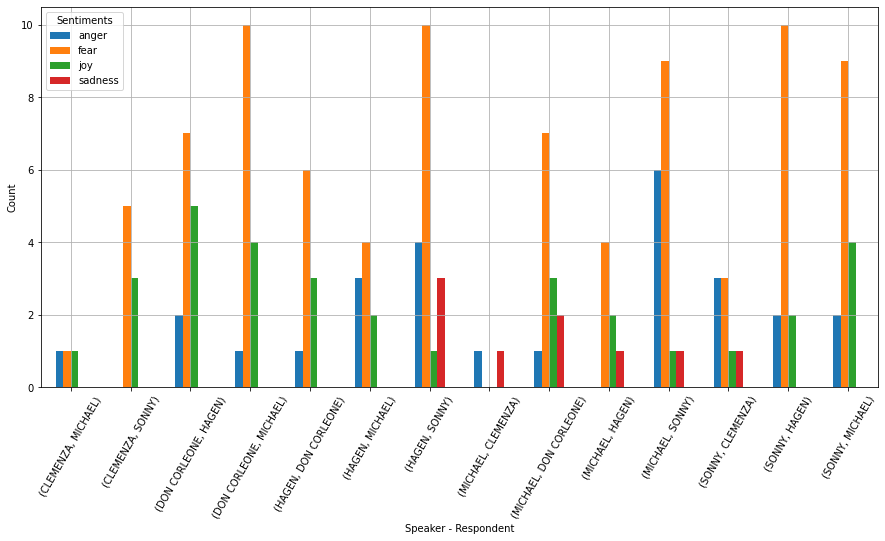

In [23]:
# plot
ax = emotions_speaker.plot(kind='bar', 
                           figsize=(15, 7), 
                           xlabel='Speaker - Respondent', 
                           ylabel='Count')
ax.legend(title='Sentiments', loc='upper left')
plt.xticks(rotation=60)
plt.grid()

In [24]:
conversations_emotions = conversations.groupby(['conversation_id'])['prediction_speaker'].value_counts().unstack()
conversations_respondent = conversations.groupby(['conversation_id'])['prediction_respondent'].value_counts().unstack()

conversations_emotions[['anger_respondent', 
                        'fear_respondent', 
                        'joy_respondent', 
                        'sadness_respondent']] = conversations_respondent

In [25]:
conversations_emotions.sort_values(by=['conversation_id'], 
                                   inplace=True)
conversations_emotions.rename(columns={"anger": "anger_speaker", 
                                       "fear": "fear_speaker", 
                                       "sadness": "sadness_speaker", 
                                       "joy": "joy_speaker"}, 
                              inplace=True)

conversations_emotions.head()

prediction_speaker,anger_speaker,fear_speaker,joy_speaker,sadness_speaker,anger_respondent,fear_respondent,joy_respondent,sadness_respondent
conversation_id,,,,,,,,
L592889,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
L592928,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
L592936,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
L592939,NaN,4.0,1.0,NaN,NaN,5.0,NaN,NaN
L592946,NaN,NaN,3.0,NaN,NaN,1.0,2.0,NaN


## Now we can see how the emotions evolve during the movie ongoing

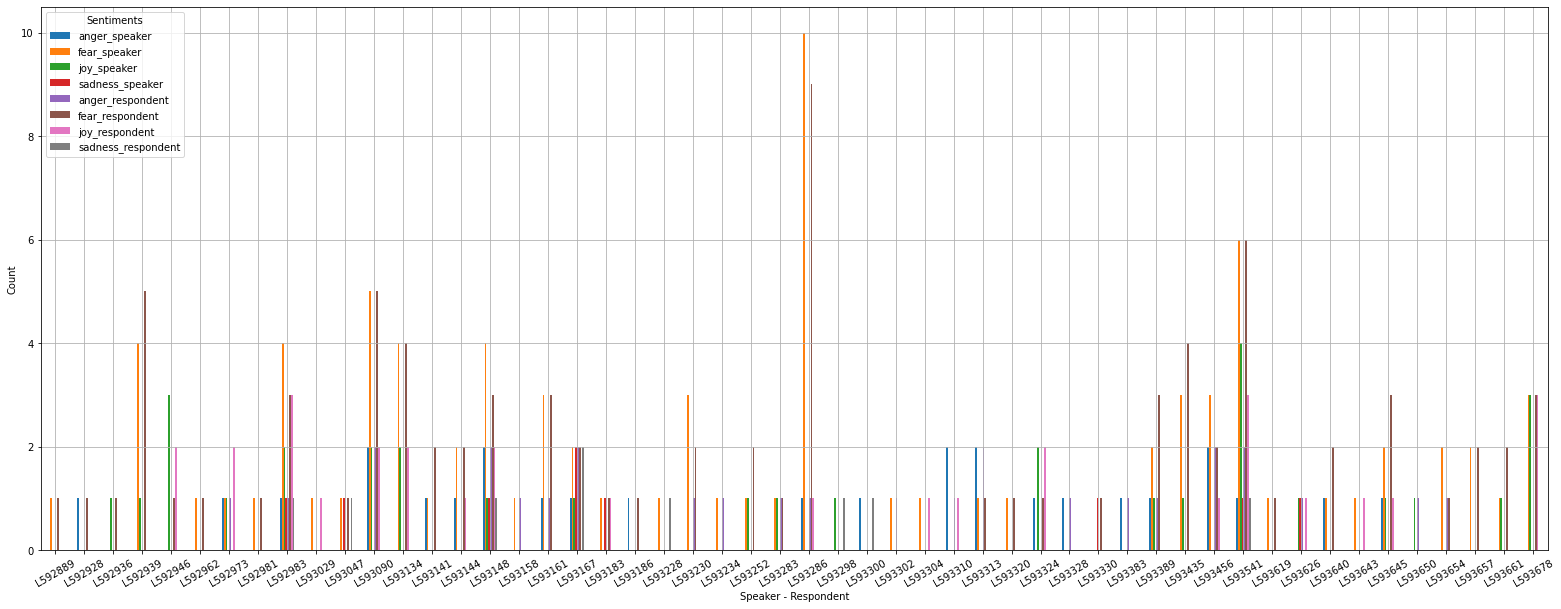

In [26]:
# plot
ax = conversations_emotions.plot(kind='bar', 
                                 figsize=(27, 10), 
                                 xlabel='Speaker - Respondent', 
                                 ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Part 1

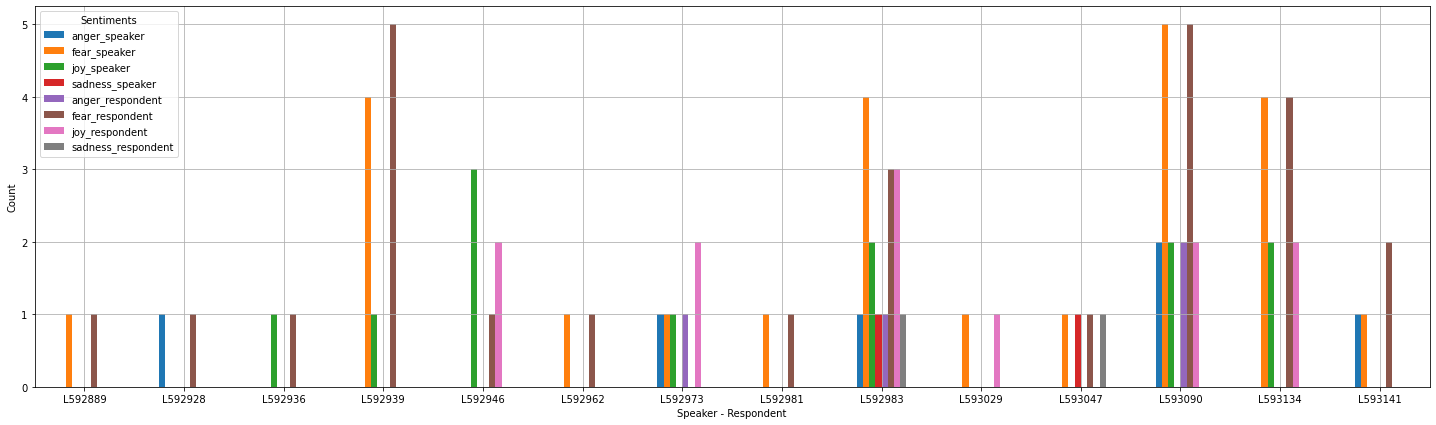

In [30]:
# plot the first part
ax = conversations_emotions.iloc[:14,:].plot(kind='bar', 
                                             figsize=(25, 7), 
                                             xlabel='Speaker - Respondent', 
                                             ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=0)
plt.grid()

## Part 2

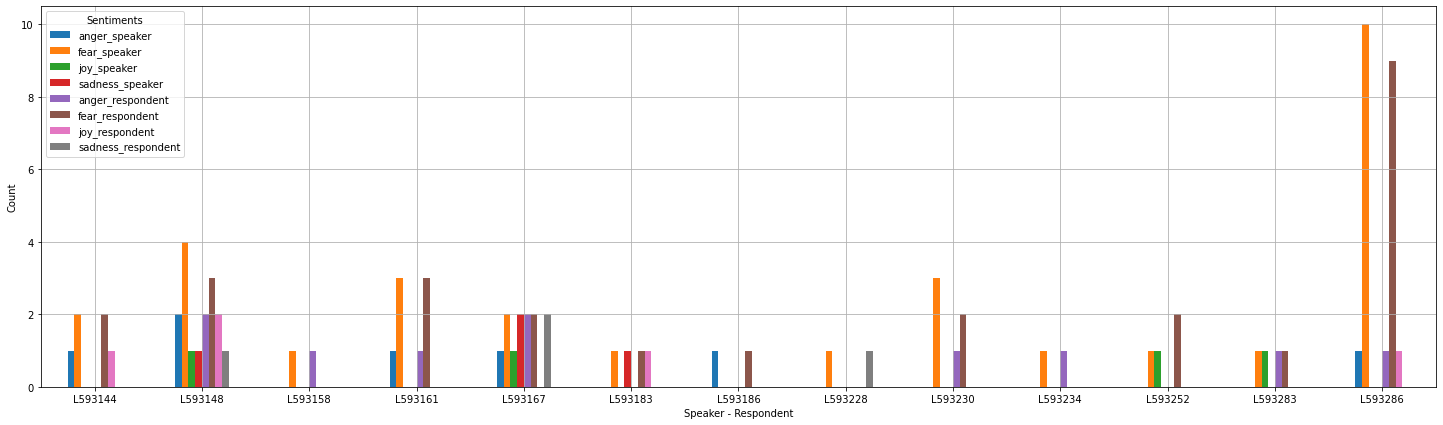

In [31]:
# plot the second part
ax = conversations_emotions.iloc[14:27,:].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=0)
plt.grid()

## Part 3

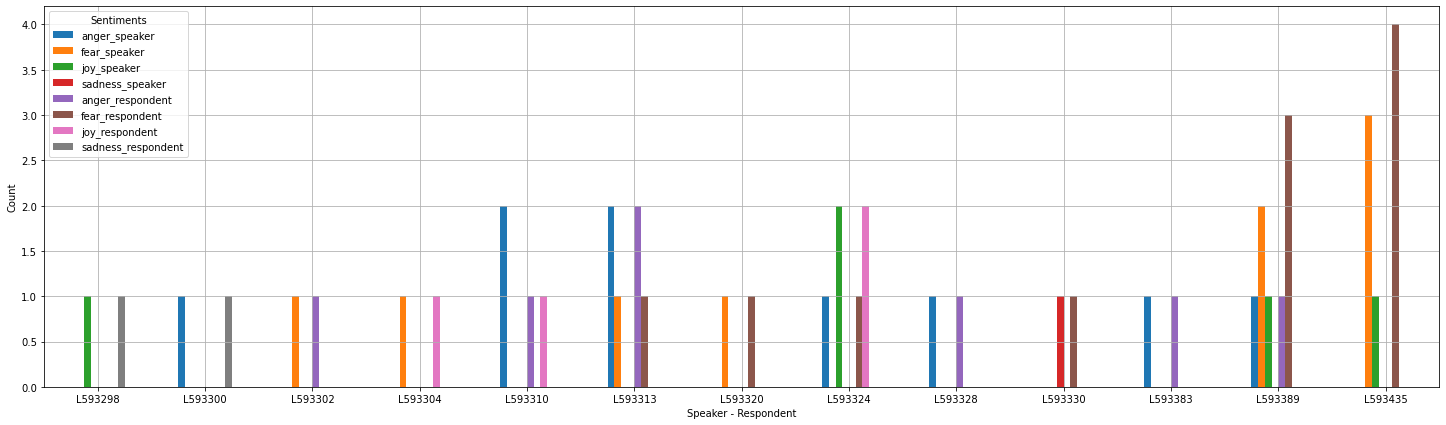

In [32]:
# plot the third part
ax = conversations_emotions.iloc[27:40,:].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=0)
plt.grid()

## Part 4

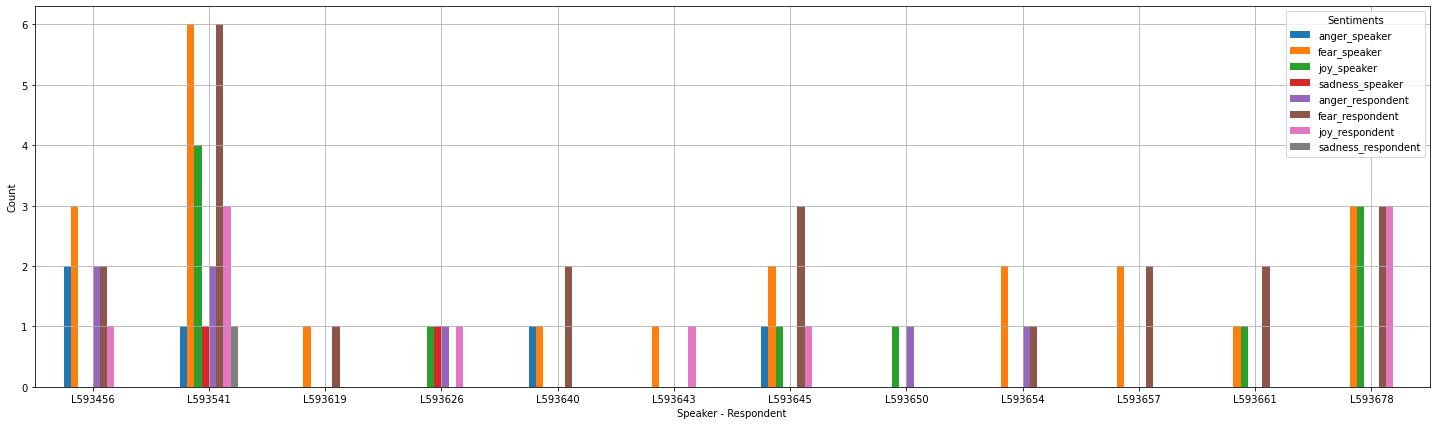

In [33]:
# plot the last part
ax = conversations_emotions.iloc[40:53,:].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper right')
plt.xticks(rotation=0)
plt.grid()

## ANGER

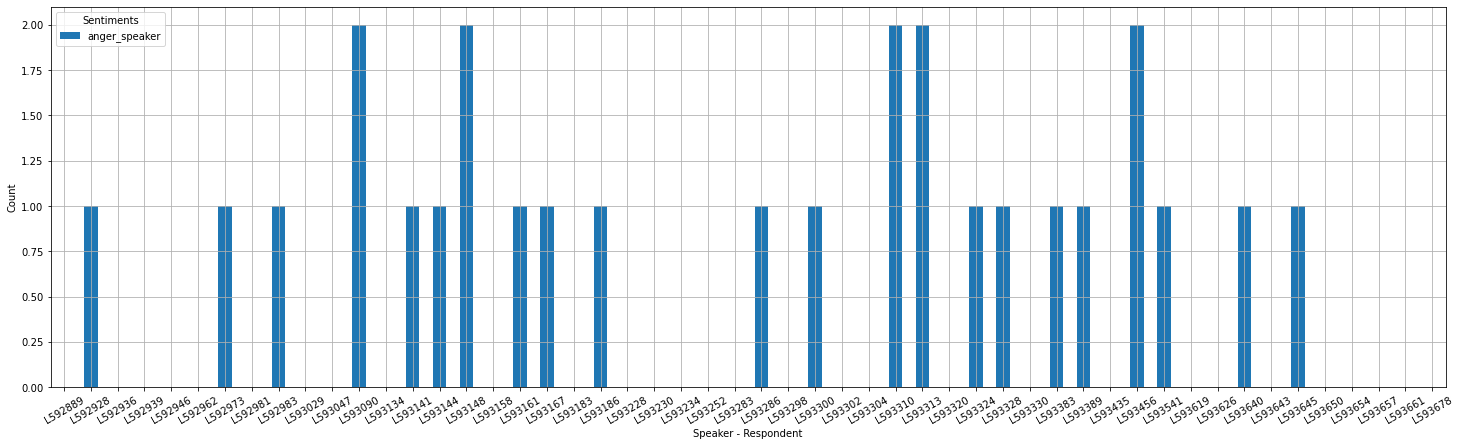

In [35]:
# plot the ANGER
ax = conversations_emotions.iloc[:,0].plot(kind='bar', 
                                           figsize=(25, 7), 
                                           xlabel='Speaker - Respondent', 
                                           ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Fear

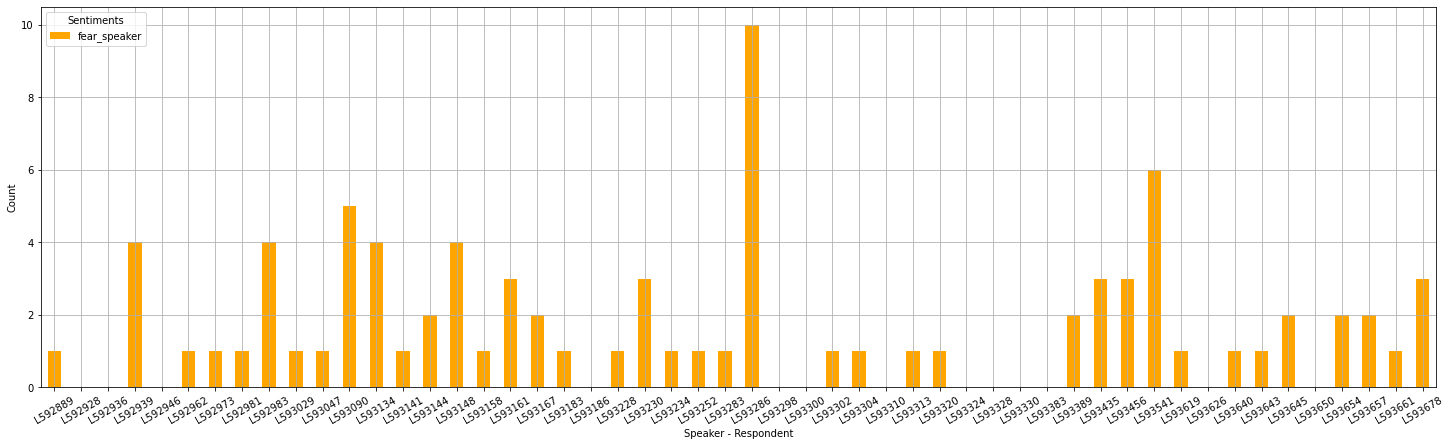

In [36]:
# plot
ax = conversations_emotions.iloc[:,1].plot(kind='bar', 
                                           figsize=(25, 7), 
                                           xlabel='Speaker - Respondent', 
                                           ylabel='Count',
                                           color='orange')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Joy

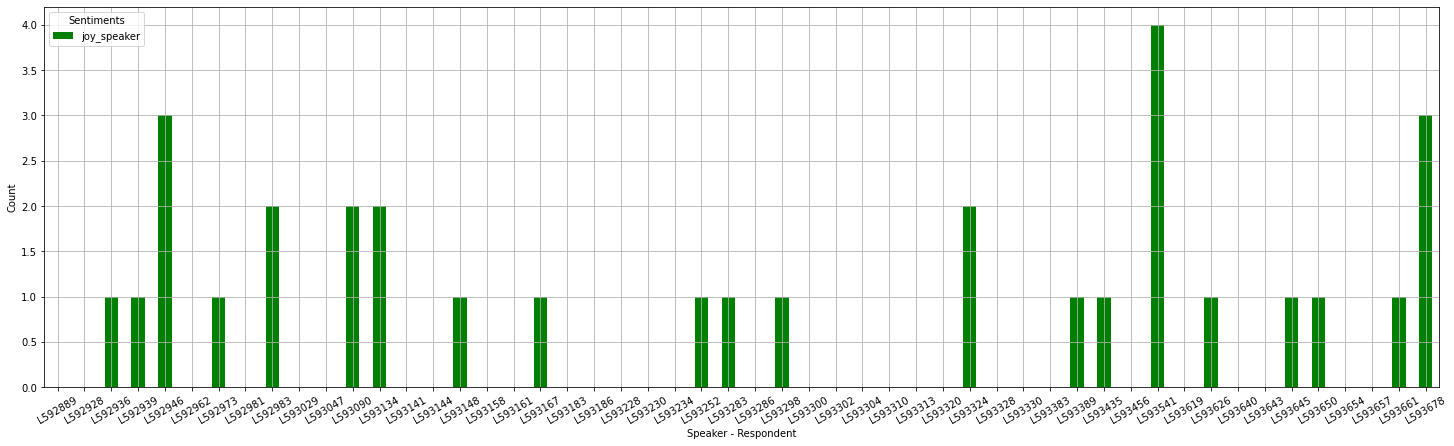

In [37]:
# plot
ax = conversations_emotions.iloc[:,2].plot(kind='bar', 
                                           figsize=(25, 7), 
                                           xlabel='Speaker - Respondent', 
                                           ylabel='Count', 
                                           color='g')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Sadness

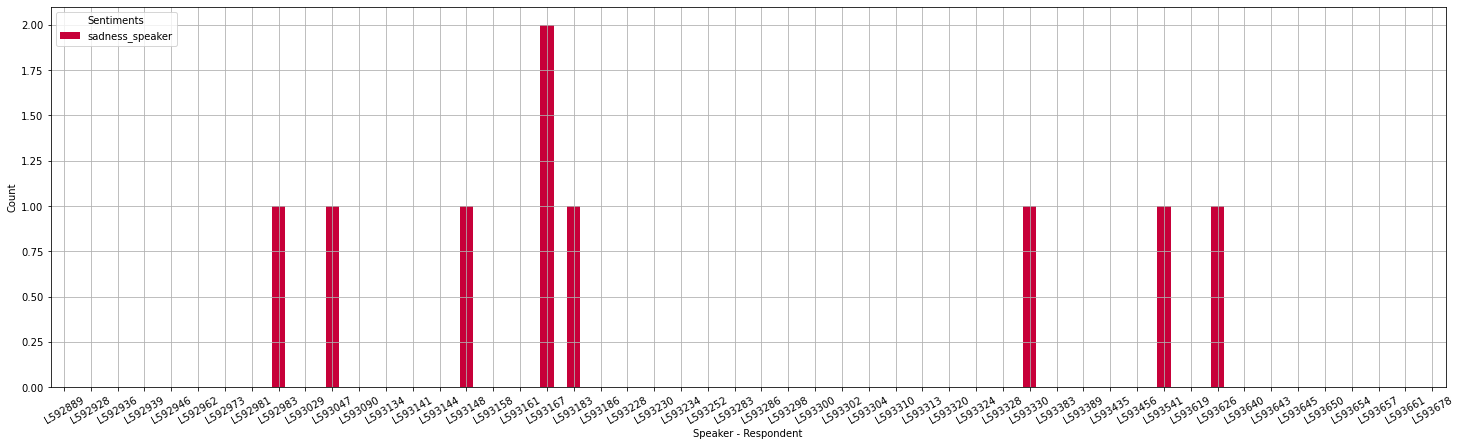

In [38]:
# plot
ax = conversations_emotions.iloc[:,3].plot(kind='bar', 
                                           figsize=(25, 7), 
                                           xlabel='Speaker - Respondent', 
                                           ylabel='Count', color='#C70039')
ax.legend(title='Sentiments', loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## First half - speaker emotions

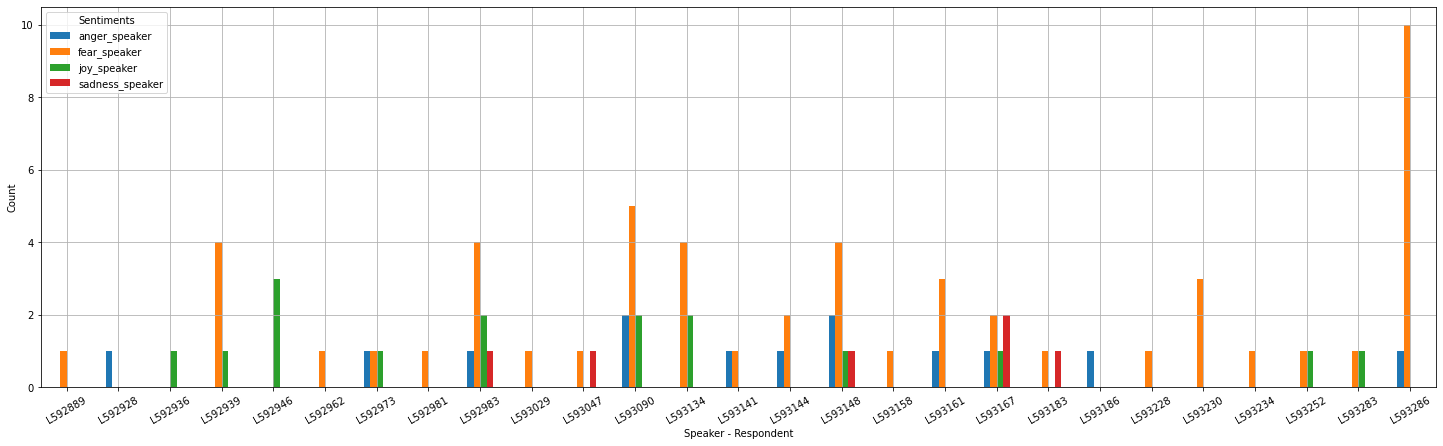

In [39]:
# plot
ax = conversations_emotions.iloc[:27,:4].plot(kind='bar', 
                                              figsize=(25, 7), 
                                              xlabel='Speaker - Respondent', 
                                              ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Second half - speaker emotions

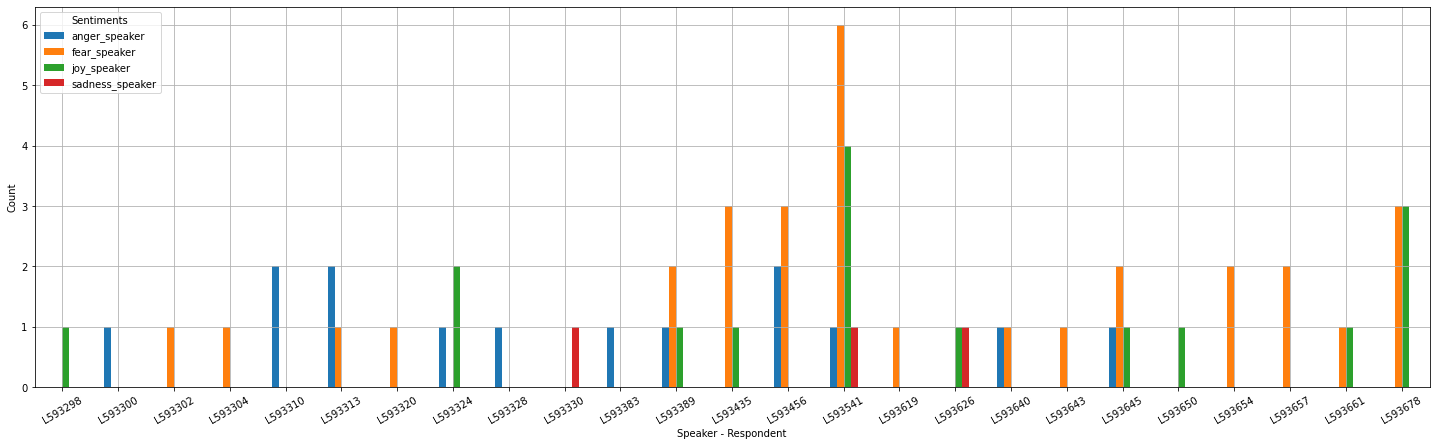

In [40]:
# plot
ax = conversations_emotions.iloc[27:,:4].plot(kind='bar', 
                                              figsize=(25, 7), 
                                              xlabel='Speaker - Respondent', 
                                              ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## First half - respondent emotions

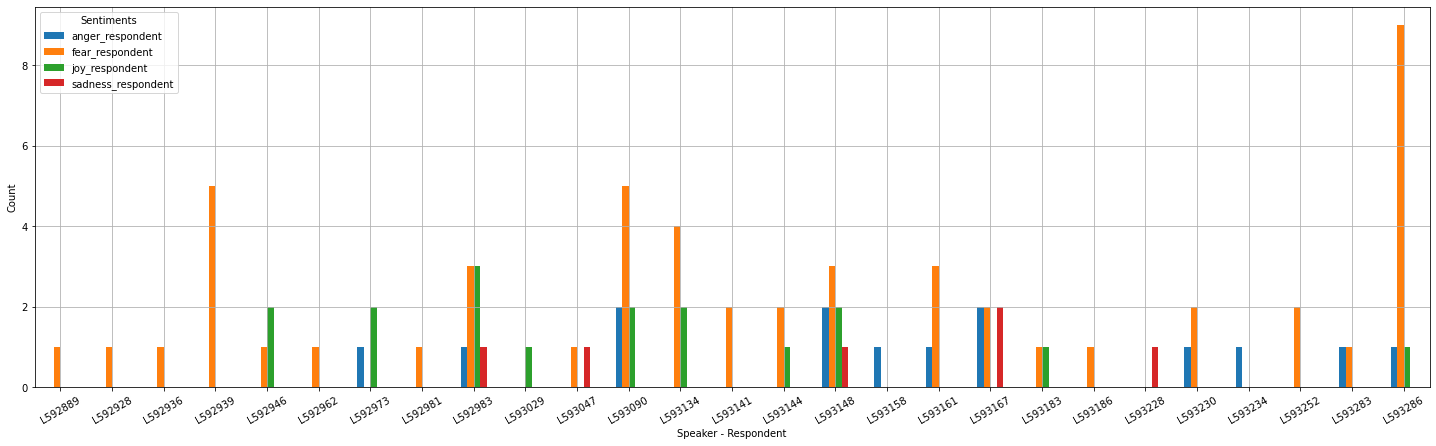

In [41]:
# plot
ax = conversations_emotions.iloc[:27,4:].plot(kind='bar', 
                                              figsize=(25, 7), 
                                              xlabel='Speaker - Respondent', 
                                              ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Second half - respondent emotions

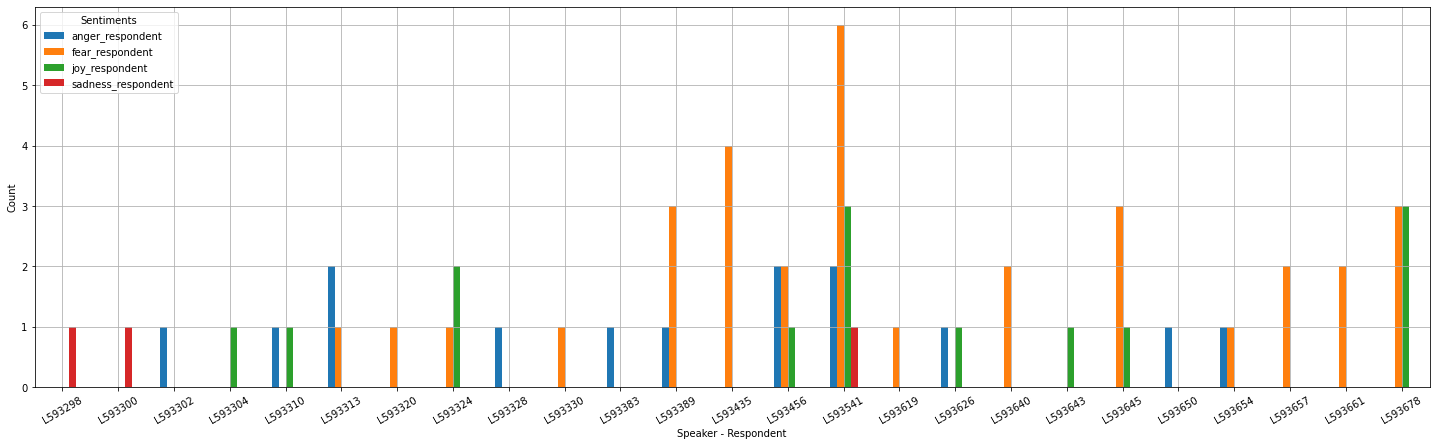

In [42]:
# plot
ax = conversations_emotions.iloc[27:,4:].plot(kind='bar', 
                                              figsize=(25, 7), 
                                              xlabel='Speaker - Respondent', 
                                              ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Anger of both speakers

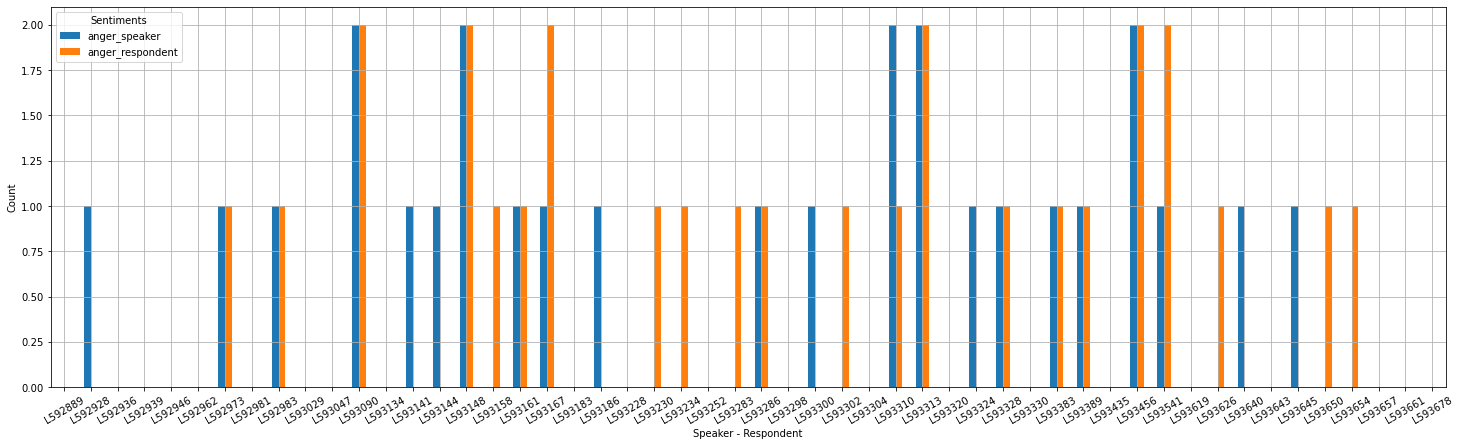

In [43]:
# plot
ax = conversations_emotions.iloc[:,[0,4]].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Fear of both speakers

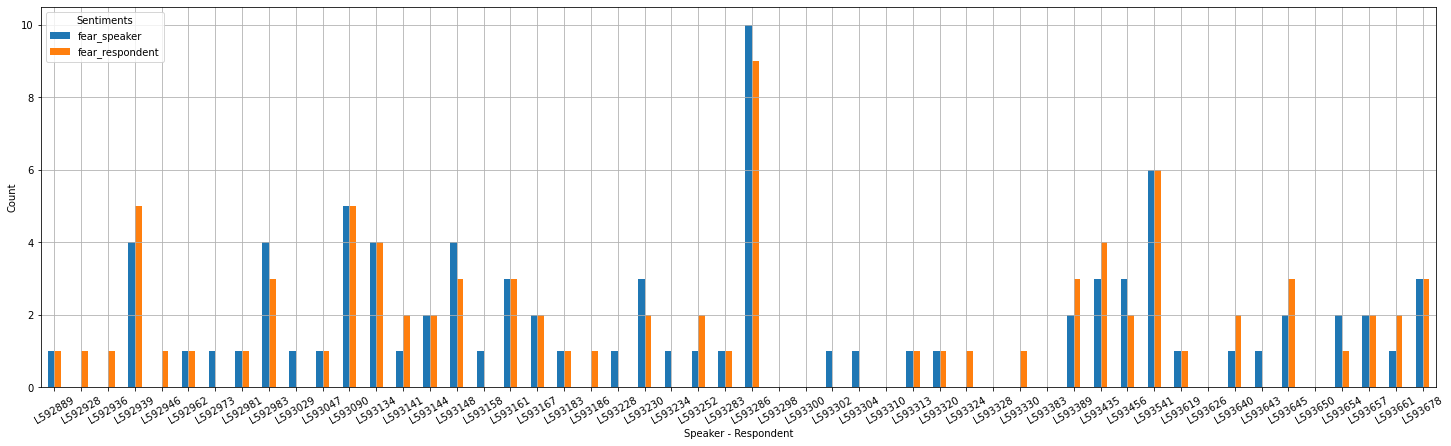

In [44]:
# plot
ax = conversations_emotions.iloc[:,[1,5]].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Joy of both speakers

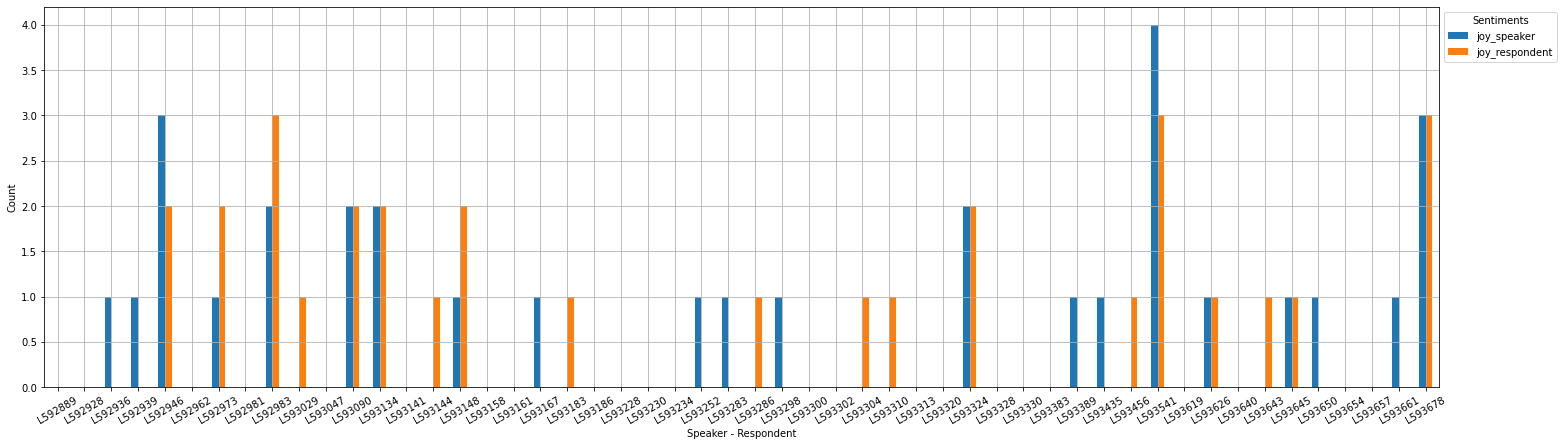

In [45]:
# plot
ax = conversations_emotions.iloc[:,[2,6]].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          bbox_to_anchor=(1, 1), 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()

## Sadness of both speakers

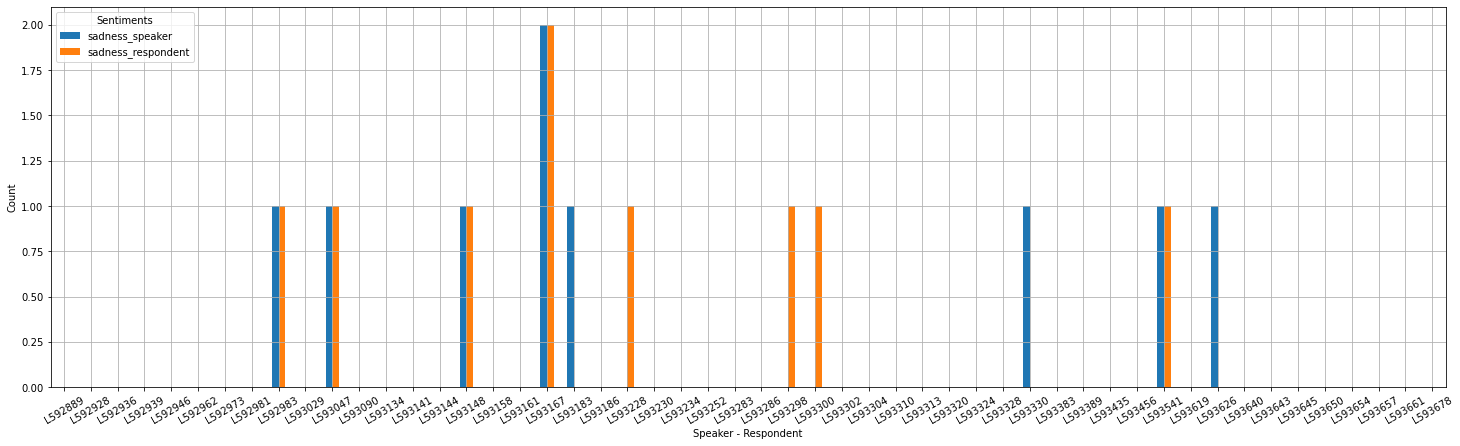

In [46]:
# plot
ax = conversations_emotions.iloc[:,[3,7]].plot(kind='bar', 
                                               figsize=(25, 7), 
                                               xlabel='Speaker - Respondent', 
                                               ylabel='Count')
ax.legend(title='Sentiments', 
          loc='upper left')
plt.xticks(rotation=30)
plt.grid()